In [1]:
import pandas as pd

df = pd.read_csv('./data_set/diabetes.csv', encoding='utf-8-sig')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test, pred)
  
	#ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  
  #ROC-AUC print
  print(f'정확도 : {accuracy:.4f} || 정밀도 : {precision:.4f} || 재현율 : {recall:.4f} || F1점수 : {f1:.4f} || AUC : {roc_auc:.4f}')


In [52]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  
	#X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot수행, 정밀도는 점섬으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle ='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
  
	#threshold값 X축의 Scale을 0.1단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  
	#x축, y축 label과 legend, grid 설정
  plt.xlabel('Threshild value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()


In [88]:
X = df.iloc[:,:-1] #제일 마지막 열 빼고 다 선택
y = df.iloc[:,-1] # 제일 마지막 열만 선택

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y )
#stratify 데이터 세트 불할시 현재 y값이 구성된 비율 그대로를 유지
#데이터의 불균형이 생기지 않도록

#로지스틱 회귀로 학습,예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
#predict_proba => 클래스별 확률을 배열로 반환
#-1의 의미는 모등 행의 마지막열의 결과만 가지고 와라, 결론적으로는 클래스1의 결과값만 반환해라
pred_proba = lr_clf.predict_proba(X_test)[:,-1]

get_clf_eval(y_test, pred, pred_proba)


오차행렬
[[88 12]
 [21 33]]
정확도 : 0.7857 || 정밀도 : 0.7333 || 재현율 : 0.6111 || F1점수 : 0.6667 || AUC : 0.8465


c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


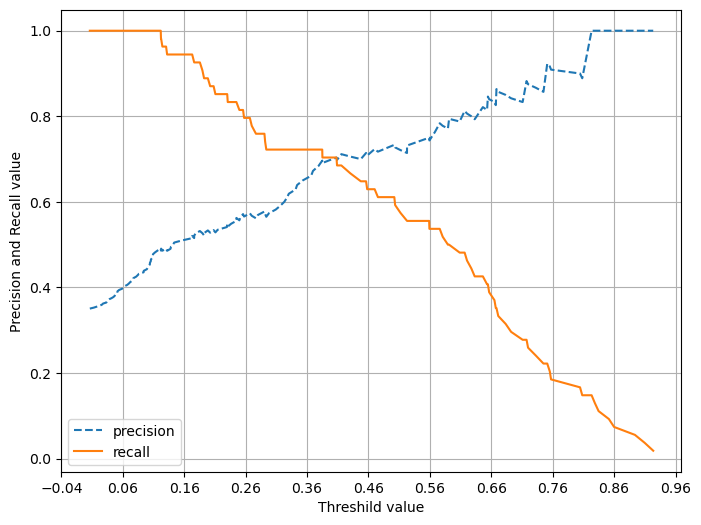

In [89]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,-1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [90]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [93]:
plt.hist(df['Glucose'], bins=10)

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

In [94]:
#피처 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI' ]

#전체 데이터 건수
total_count = df['Glucose'].count()

#피처별로 반복하면서 값이 0인 데이터 추출하고 퍼센트 계산
for feature in zero_features:
  zero_count = df[df[feature] == 0][feature].count()
  print(f'{feature} 건수는 {zero_count}, 퍼센트는 {(zero_count/total_count)*100}')

Glucose 건수는 5, 퍼센트는 0.6510416666666667
BloodPressure 건수는 35, 퍼센트는 4.557291666666666
SkinThickness 건수는 227, 퍼센트는 29.557291666666668
Insulin 건수는 374, 퍼센트는 48.69791666666667
BMI 건수는 11, 퍼센트는 1.4322916666666665


In [95]:
#zero_feature리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체

df[zero_features] = df[zero_features].replace(0, df[zero_features].mean())

In [106]:
X = df.iloc[:, :-1] #제일 마지막 열 빼고 다 선택
y = df.iloc[:, -1] # 제일 마지막 열만 선택

#StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test  = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y )
#stratify 데이터 세트 불할시 현재 y값이 구성된 비율 그대로를 유지
#데이터의 불균형이 생기지 않도록

#로지스틱 회귀로 학습,예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
#predict_proba => 클래스별 확률을 배열로 반환
#-1의 의미는 모등 행의 마지막열의 결과만 가지고 와라, 결론적으로는 클래스1의 결과값만 반환해라
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987 || 정밀도 : 0.7674 || 재현율 : 0.6111 || F1점수 : 0.6804 || AUC : 0.8433


In [109]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  #thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임계값 : ', custom_threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [110]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.3
오차행렬
[[67 33]
 [11 43]]
정확도 : 0.7143 || 정밀도 : 0.5658 || 재현율 : 0.7963 || F1점수 : 0.6615 || AUC : 0.8433
임계값 :  0.33
오차행렬
[[72 28]
 [12 42]]
정확도 : 0.7403 || 정밀도 : 0.6000 || 재현율 : 0.7778 || F1점수 : 0.6774 || AUC : 0.8433
임계값 :  0.36
오차행렬
[[76 24]
 [15 39]]
정확도 : 0.7468 || 정밀도 : 0.6190 || 재현율 : 0.7222 || F1점수 : 0.6667 || AUC : 0.8433
임계값 :  0.39
오차행렬
[[78 22]
 [16 38]]
정확도 : 0.7532 || 정밀도 : 0.6333 || 재현율 : 0.7037 || F1점수 : 0.6667 || AUC : 0.8433
임계값 :  0.42
오차행렬
[[84 16]
 [18 36]]
정확도 : 0.7792 || 정밀도 : 0.6923 || 재현율 : 0.6667 || F1점수 : 0.6792 || AUC : 0.8433
임계값 :  0.45
오차행렬
[[85 15]
 [18 36]]
정확도 : 0.7857 || 정밀도 : 0.7059 || 재현율 : 0.6667 || F1점수 : 0.6857 || AUC : 0.8433
임계값 :  0.48
오차행렬
[[88 12]
 [19 35]]
정확도 : 0.7987 || 정밀도 : 0.7447 || 재현율 : 0.6481 || F1점수 : 0.6931 || AUC : 0.8433
임계값 :  0.5
오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987 || 정밀도 : 0.7674 || 재현율 : 0.6111 || F1점수 : 0.6804 || AUC : 0.8433


In [111]:
#임계값을 0.48fh tjfwjdgks Binarizer 생성
binarizer = Binarizer(threshold=0.48)

#위에서 구한 lr_clf의 predict_proba() 예측확률 array에서 1에 해당하는 컬럼값을 Binarizer변환.
pred_th_48 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))

get_clf_eval(y_test, pred_th_48, pred_proba[:, 1])

오차행렬
[[88 12]
 [19 35]]
정확도 : 0.7987 || 정밀도 : 0.7447 || 재현율 : 0.6481 || F1점수 : 0.6931 || AUC : 0.8433
